## Import Tweets to dataframe

In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the directory where your files are located
directory = "tweets"

data = []
# Loop through each file in the directory and add a progress bar
for filename in tqdm(os.listdir(directory)):
    # Check if the file is a text file and has the correct date format
    if filename.endswith(".txt"):
        year = filename[:4]
        month = filename[5:7]
        # Read the file and append each line to the data list
        i = 0
        with open(os.path.join(directory, filename)) as file:
            for line in file:
                final_tweet = line
                data.append({"year": year, "month": month, "tweet": final_tweet})
#                 i += 1
#                 if i > 1:
#                     break



# Read the data into a DataFrame
df = pd.DataFrame(data, columns=["year", "month", "tweet"])

# Combine the year and month columns into a single date column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=5))
df.set_index('date', inplace=True)

# Describe dataframe
df.describe()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 147/147 [00:03<00:00, 37.65it/s]


,year,month,tweet
count,6383732,6383732,6383732
unique,13,12,5582202
top,2013,12,Thuis\n
freq,1752741,652678,6000


In [2]:
df.sort_values(by='year', ascending=False).head(15)

,year,month,tweet
date,,,
2023-02-05,2023,02,@PvdA Wat is dit?\n
2023-01-05,2023,01,Duitsland belooft meer wapens voor Oekraïne ht...
2023-01-05,2023,01,Rusland: anderhalve dag wapenstilstand morgen ...
2023-01-05,2023,01,@Thuisop24 @esther1980w @1981ikke @LijfenLijn ...
2023-01-05,2023,01,RT @ADGroningen: Ferry tussen Eemshaven en Noo...
2023-01-05,2023,01,Chelsea scoort geen punten met hun transferbel...
2023-01-05,2023,01,@bensonnemans Mooi hè Ben! Ik heb de (oneerlij...
2023-01-05,2023,01,@ducom99 @op1npo @vanranstmarc @sjoerddendaas ...
2023-01-05,2023,01,@margotlantinga Een hele rollade. Goeie grutte...


## Preprocessing tweets


In [11]:
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove mentions
    tweet = re.sub(r'@\S+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\S+', '', tweet)
    
    # Remove digits
    tweet = re.sub(r'\d+', '', tweet)
    
    # Remove retweets
    tweet = re.sub(r'^RT @\w+: ', '', tweet)

    # Remove "RT"
    tweet = re.sub(r'^RT', '', tweet)
    
    # Remove starting semicolon that sometimes comes with RTs
    tweet = re.sub(r'^:', '', tweet)    

    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Preprocess tweets
tqdm.pandas()
df['tweet'] = df['tweet'].progress_apply(preprocess_tweet)

100%|██████████████████████████████████████████████████████████████████████████████| 6383732/6383732 [00:35<00:00, 179768.24it/s]


In [10]:
def check_sentence(tweet):
    # Regular expression to match a sentence with correct capitalization and punctuation
    pattern = r'^[A-Z][a-z0-9,;\s]+[.?!]' # removed $ at end
    return bool(re.match(pattern, tweet))

# Apply the check_sentence function to each tweet in the dataframe
df['correct_cap_punc'] = df['tweet'].progress_apply(check_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 6383732/6383732 [00:04<00:00, 1285110.90it/s]


In [5]:

df.sort_values(by='year', ascending=False).head(15)
# df.describe()

,year,month,tweet,correct_cap_punc
date,,,,
2023-02-05,2023,02,Wat is dit?,True
2023-01-05,2023,01,Duitsland belooft meer wapens voor Oekraïne,False
2023-01-05,2023,01,Rusland: anderhalve dag wapenstilstand morgen ...,False
2023-01-05,2023,01,Je kan vragen stellen via social media. voor v...,True
2023-01-05,2023,01,Ferry tussen Eemshaven en Noorwegen in trek: t...,False
2023-01-05,2023,01,Chelsea scoort geen punten met hun transferbel...,False
2023-01-05,2023,01,Mooi hè Ben! Ik heb de (oneerlijke) randori’s ...,False
2023-01-05,2023,01,"Het énige wat ""ze""nog kunnen doen is, Blokken.",False
2023-01-05,2023,01,Een hele rollade. Goeie grutten zeg.,True


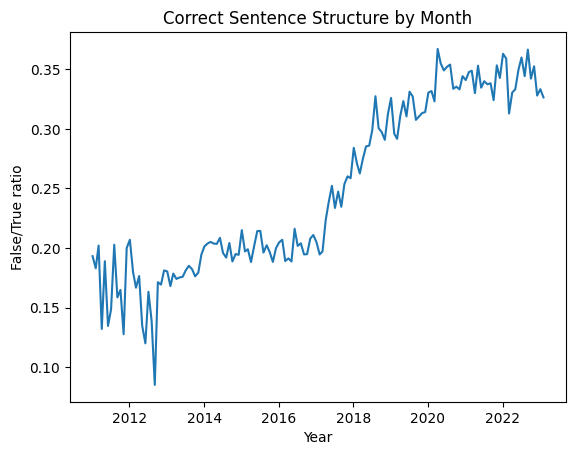

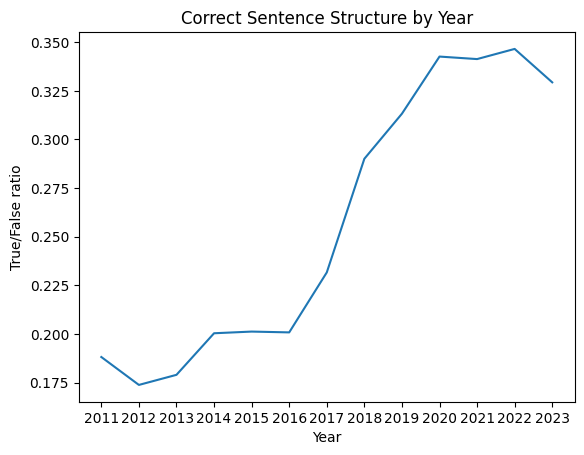

In [12]:
# Group the data by year and count the number of tweets
df_grouped = df.groupby('date')['correct_cap_punc'].mean().reset_index()
plt.plot(df_grouped['date'], df_grouped['correct_cap_punc'])
plt.xlabel('Year')
plt.ylabel('False/True ratio')
plt.title('Correct Sentence Structure by Month')
plt.show()

df_grouped = df.groupby('year')['correct_cap_punc'].mean().reset_index()
plt.plot(df_grouped['year'], df_grouped['correct_cap_punc'])
plt.xlabel('Year')
plt.ylabel('True/False ratio')
plt.title('Correct Sentence Structure by Year')
plt.show()

Text(0.5, 1.0, 'Percentage of Correct Sentence Structure by Year/Month')

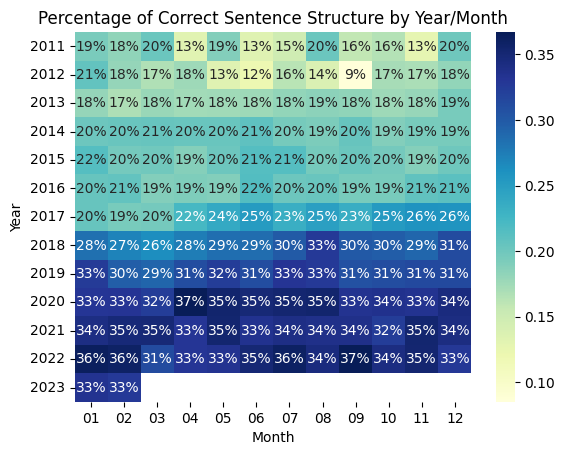

In [9]:
import seaborn as sns

# Group the data by year and month and count the number of true/false values
grouped = df.groupby(['year', 'month']).agg({'correct_cap_punc': ['sum', 'count']})
grouped.columns = ['true', 'total']

# Calculate the percentage of true values for each month
grouped['pct_true'] = grouped['true'] / grouped['total']

# Create a pivot table with the percentage of true values for each year/month
table = pd.pivot_table(grouped, values='pct_true', index='year', columns='month')

# Create a heatmap
fig, ax = plt.subplots()
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.0%')

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_title('Percentage of Correct Sentence Structure by Year/Month')


        true    total  pct_true
year                           
2011    3415    18145  0.188206
2012   87614   503920  0.173865
2013  313831  1752741  0.179052
2014  139030   693722  0.200412
2015  102112   507329  0.201274
2016   90698   451554  0.200857
2017   92995   401410  0.231671
2018   96971   334300  0.290072
2019  101783   324949  0.313228
2020  133258   388973  0.342589
2021  156863   459603  0.341301
2022  165355   477187  0.346520
2023   23021    69899  0.329347


Text(0.5, 1.0, 'Percentage of True/False Tweets by Year/Month')

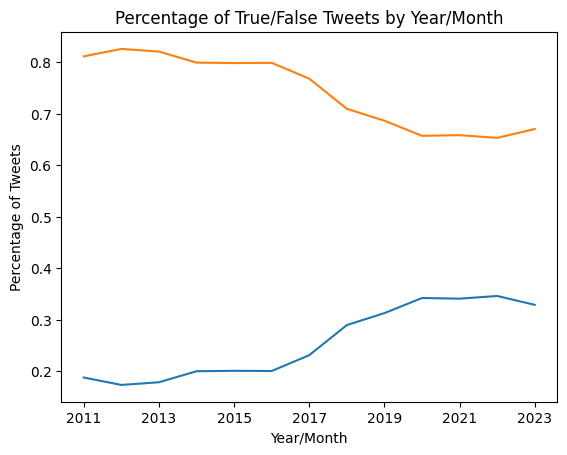

In [13]:
# Group the data by year and month and count the number of true/false values
grouped = df.groupby(['year']).agg({'correct_cap_punc': ['sum', 'count']})
grouped.columns = ['true', 'total']

# Calculate the percentage of true values for each month
grouped['pct_true'] = grouped['true'] / grouped['total']
print(grouped)

# Create a line chart
fig, ax = plt.subplots()
grouped['pct_true'].plot(ax=ax)
grouped['pct_false'] = 1 - grouped['pct_true']
grouped['pct_false'].plot(ax=ax)

# Set the axis labels and title
ax.set_xlabel('Year/Month')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Percentage of True/False Tweets by Year/Month')
